In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils.pct import PCT
from utils.pca import PCA
from datasets import load_dataset
from utils.plotting import scatter

# Iris

In [2]:
iris_data, iris_features = load_dataset.iris()

In [3]:
iris_data["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris_pca = PCA(iris_features, iris_data["class"])
iris_projected = iris_pca.project(2)

iris_projected = iris_projected.sample(frac=1).reset_index(drop=True)

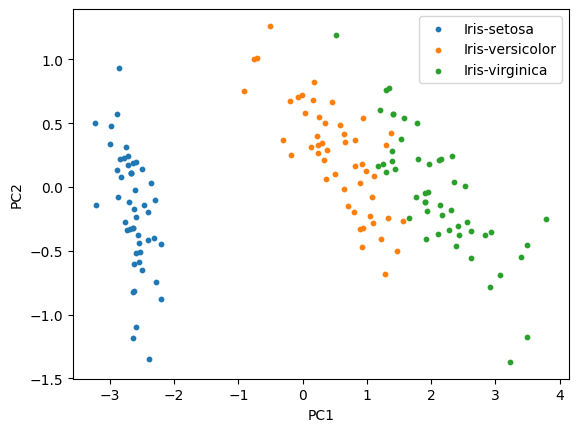

In [5]:
scatter(iris_projected, ["PC1", "PC2"], iris_projected["class"].unique(), 10)

Text(0, 0.5, 'PC2')

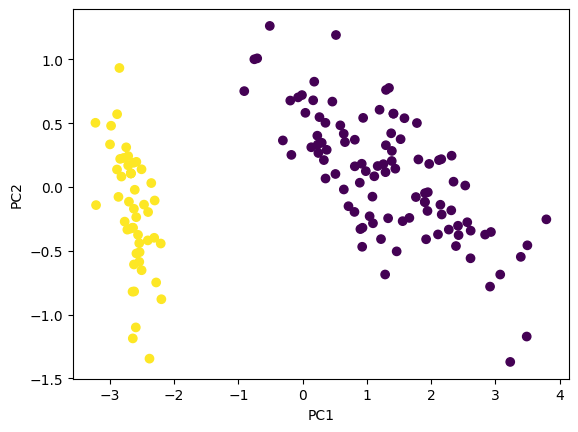

In [10]:
plt.scatter(iris_projected["PC1"], iris_projected["PC2"], c=[1 if c == "Iris-setosa" else -1 for c in iris_projected["class"]], cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [7]:
values = iris_projected.sort_values("PC1").reset_index(drop=True).values
x_plot = values[:, 0]

In [46]:
labels = np.array([[-1 if c == "Iris-setosa" else 1 for c in iris_projected["class"]]]).T
iris_pct = PCT(2, np.array([[0.1], [0.2], [0.3]]))
i = iris_pct.fit(iris_projected[["PC1", "PC2"]].values, labels, 0.4, 1000, 0.001)

print(i)
W = iris_pct.getW()
print(W)

0
[[0.1]
 [0.2]
 [0.3]]


In [47]:
(iris_pct.predict(iris_projected[["PC1", "PC2"]].values) == labels).sum()

150

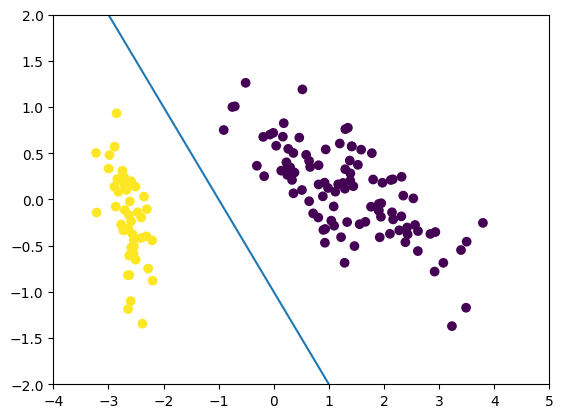

In [43]:
x = np.arange(-10, 10, 0.1)
y = -(W[0] + x * W[1])/W[2]
plt.plot(x, y)
plt.axis([-4, 5, -2, 2])
plt.scatter(iris_projected["PC1"], iris_projected["PC2"], c=[1 if c == "Iris-setosa" else -1 for c in iris_projected["class"]], cmap="viridis")

In [122]:
def multiclass_pct(data: pd.DataFrame, classes: pd.Series, plot_range: list = None):
  unique_label = classes.unique()

  new_class = classes
  for i, l in enumerate(unique_label):
    new_class = [i if l == c else c for c in new_class]

  if plot_range is None:
    plot_range = [-10, 10, -10, 10]

  Ws: list[np.ndarray] = []

  for classify_label in unique_label:
    new_labels = [1 if l == classify_label else -1 for l in classes]
    print(new_labels)
    pct = PCT(2)
    pct.fit(data.values, new_labels, 0.2, 1000)
    Ws.append(pct.getW())

  x = np.arange(plot_range[0], plot_range[1], 0.1)
  print(Ws)
  for i, W in enumerate(Ws):
    y = -(W[0] + x*W[1])/W[2]
    plt.plot(x, y, label=f"{unique_label[i]} from the rest")
  
  plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=new_class, cmap="viridis")
  plt.axis(plot_range)
  plt.legend()
  plt.show()

[1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1]
[-1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 

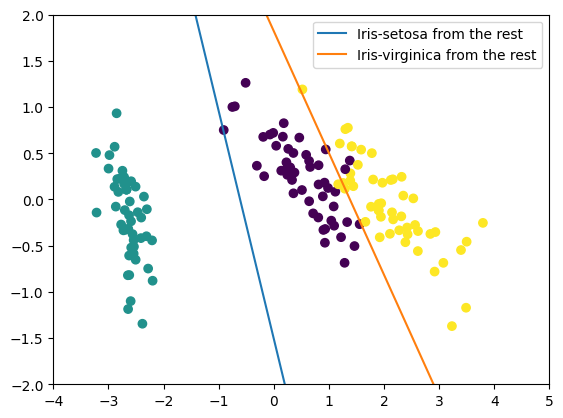

In [29]:
multiclass_pct(iris_projected[["PC1", "PC2"]], iris_projected["class"], [-4, 5, -2, 2])

In [12]:
len(iris_projected["class"].unique())

3

# Rice

In [50]:
rice_data, rice_features = load_dataset.rice()
rice_data["class"].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [92]:
rice = (rice_features - rice_features.min())/(rice_features.max() -rice_features.min())


In [93]:
rice_pca = PCA(rice, rice_data["class"])
rice_projected = rice_pca.project(2)

rice_projected = rice_projected.sample(frac=1).reset_index(drop=True)

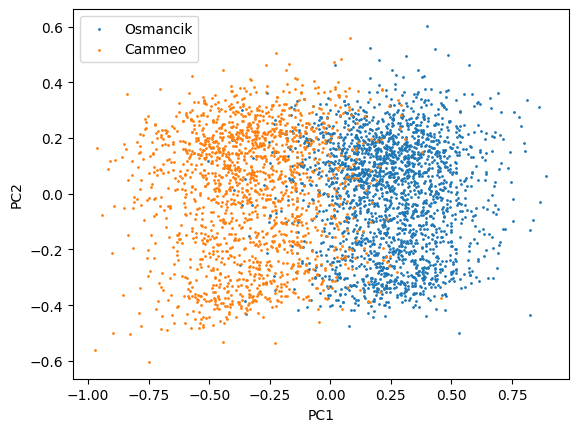

In [94]:
scatter(rice_projected, ["PC1", "PC2"], rice_projected["class"].unique(), 1)

In [95]:
values = rice_projected.sort_values("PC1").reset_index(drop=True).values
x_plot = values[:, 0]

In [96]:
labels = np.array([[-1 if c == "Cammeo" else 1 for c in rice_projected["class"]]]).T
rice_pct = PCT(2)
i = rice_pct.fit(rice_projected[["PC1", "PC2"]].values, labels, 0.2, 1000, 0.001)

print(i)
W = rice_pct.getW()
print(W)

999
[[ 13.58193288]
 [410.63561452]
 [ -3.06830642]]


In [97]:
(rice_pct.predict(rice_projected[["PC1", "PC2"]].values) == labels).sum()

3474

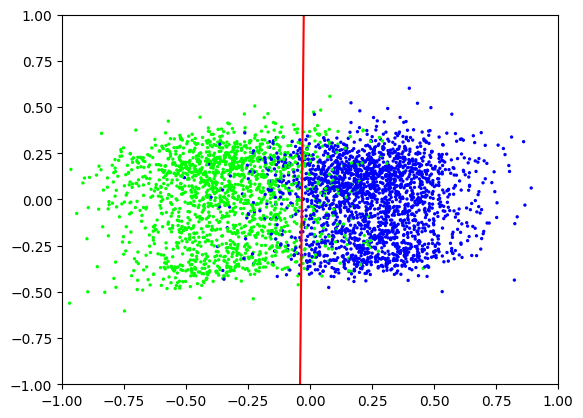

In [99]:
x = np.arange(-1000, 1000)
y = -(W[0] + x * W[1])/W[2]
plt.plot(x, y, c="red")
plt.axis([-1, 1, -1, 1])
plt.scatter(rice_projected["PC1"], rice_projected["PC2"], c=[1 if c == "Cammeo" else -1 for c in rice_projected["class"]], cmap="brg", s = 2)

[1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1,

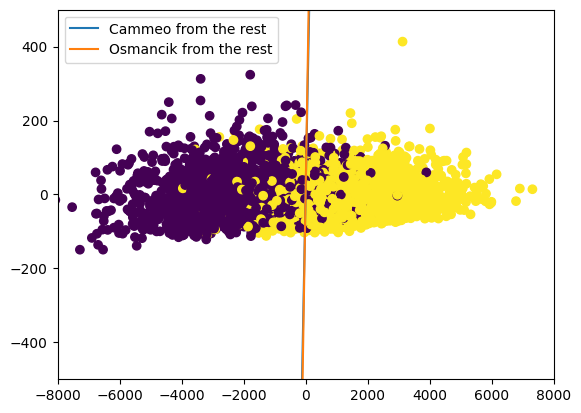

In [20]:
multiclass_pct(rice_projected[["PC1", "PC2"]], rice_projected["class"], [-8000, 8000, -500, 500])

# Wine

In [77]:
wine_data, wine_features = load_dataset.wine()
wine_data["class"].unique()

array([1, 2, 3], dtype=int64)

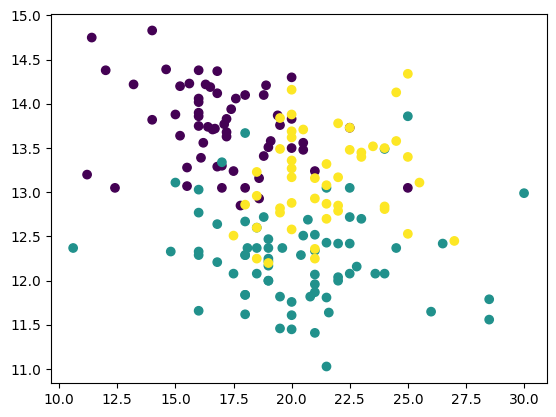

In [83]:
plt.scatter(wine_data["Alcalinity of ash"],wine_data["Alcohol"], c=wine_data["class"], cmap="viridis")

In [88]:
wine = (wine_features - wine_features.min())/(wine_features.max() -wine_features.min())

In [89]:
wine_pca = PCA(wine, wine_data["class"])
wine_projected = wine_pca.project(2)

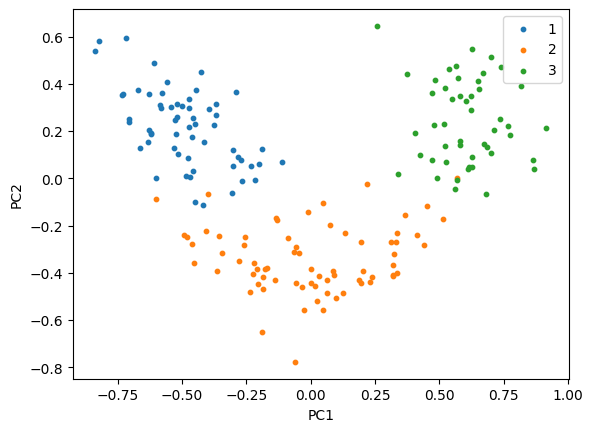

In [90]:
scatter(wine_projected, ["PC1", "PC2"], wine_projected["class"].unique(), 10)

Text(0, 0.5, 'PC2')

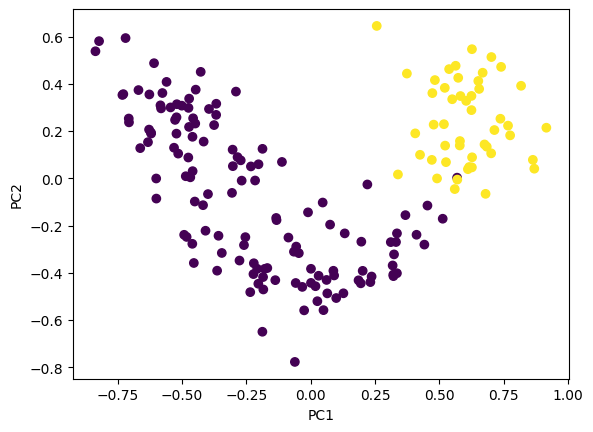

In [110]:
plt.scatter(wine_projected["PC1"], wine_projected["PC2"], c=[1 if c == 3 else -1 for c in wine_projected["class"]], cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [148]:
labels = np.array([[-1 if c == 3 else 1 for c in wine_projected["class"]]]).T
wine_pct = PCT(2)
i = wine_pct.fit(wine_projected[["PC1", "PC2"]].values, labels, 0.05, 1000, 0.001)

print(i)
W = wine_pct.getW()
print(W)

999
[[ 0.32722279]
 [-0.72190351]
 [-1.37864398]]


In [146]:
(wine_pct.predict(wine_projected[["PC1", "PC2"]].values) == labels).sum()

176

Text(0, 0.5, 'PC2')

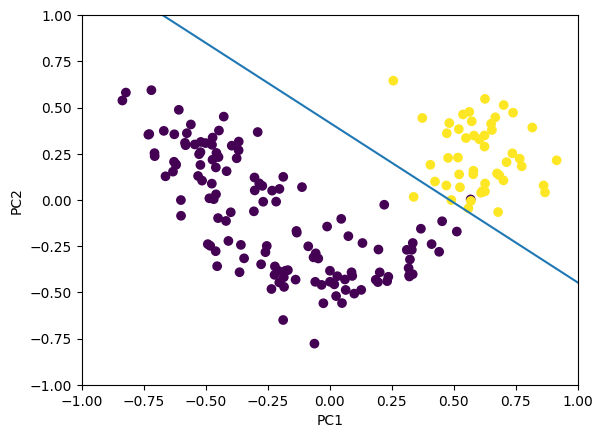

In [147]:
x = np.arange(-60, 40)
y = -(W[0] + x * W[1])/W[2]
plt.plot(x, y)
plt.axis([-1, 1, -1, 1])
plt.scatter(wine_projected["PC1"], wine_projected["PC2"], c=[1 if c == 3 else -1 for c in wine_projected["class"]], cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

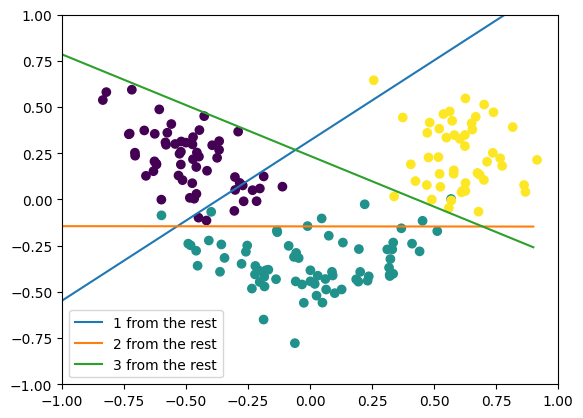

In [123]:
multiclass_pct(wine_projected[["PC1", "PC2"]], wine_projected["class"], [-1, 1, -1, 1]) 